<a href="https://colab.research.google.com/github/Priyo-prog/Machine-Learning/blob/main/Principal%20Component%20Analysis/principal_components_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis**

* Create some gene data
* Use **PCA()** function from sklearn to do PCA
* Determine how much variation each principal components accounts for
* Draw a fancy PCA graph using matplotlib
* Examin the loading scores to determine what variables have the largest effect on the graph.

## Import important packages

In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Generate sample dataset

* The first thing we do is generate an array of 100 gene names.
* Since this is just an example we name them as "gene1", "gene2" etc.

In [3]:
genes = ['gene' + str(i) for i in range(1,101)]

* Now we create arrays of sample names.
* We have 5 "wild type" or "wt" samples
* 5 "knock out" or "ko" samples

In [4]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

Now we create a pandas dataframe to store the made up data

In [5]:
# The "stars" unpack the "wt" and "ko" arrays so that column names are single array
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

Finally creating the random data.

* For each gene in the "index", we create 5 values for "wt" samples and 5 values for "ko" samples
* The made up datacomes from two possion distribution: one for wt samples and one for ko samples

In [6]:
for gene in data.index:
  data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
  data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [7]:
data.head(), data.shape

(       wt1  wt2  wt3  wt4  wt5  ko1   ko2  ko3  ko4  ko5
 gene1  577  542  555  557  584   11    11   13   13   14
 gene2  563  550  575  528  571   59    71   68   66   59
 gene3  434  409  430  458  424  592   628  552  556  599
 gene4  316  370  336  336  355  941  1041  978  960  928
 gene5  480  480  475  504  431  482   480  494  488  464, (100, 10))

## Preprocessing the data

* Before we do PCA we have to centre and scale the data
* After centering, the average value for each gene will be 0 and after scaling the standard deviation for the values for each gene will be 1
* We are transposing the data, the scale function expects the samples to be rows instead of columns.
* We can also use StandardScaler().fit_transform() as well

In [8]:
scaled_data = preprocessing.scale(data.T)

# Now we are good to go ahead with PCA, create an object of PCA class
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

## Visualize the data

* We will draw a Scree plot
* The frst thing we will do is calculate the percentage of variation that each principal component accounts for.


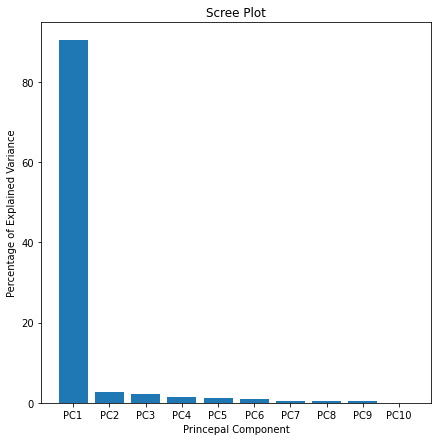

In [16]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# Create labels for the Scree plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
                                       
plt.figure(figsize=[7,7])
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Princepal Component')
plt.title('Scree Plot')
plt.show()                                       

## Draw a PCA plot


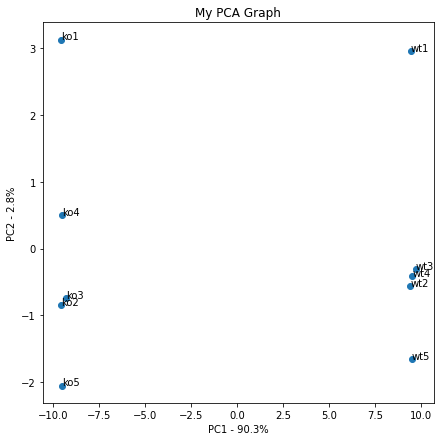

In [17]:
# First put the new coordinates created by pca.transform(scaled.data)
# into a nice matrix where rows have sample labels and columns has PC labels

pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

# Draw a scatter plot
plt.figure(figsize=[7,7])
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
  plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()  

## Loading Scores

Let's look at the loading scores for PC1 to determine which genes had the largest influence on separating the two clusters along the x-axis

In [18]:
loading_scores = pd.Series(pca.components_[0], index=genes)

# We sort the loading scores based on their magnitude (absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# We are just getting the names of the top 10 indexes (which are the gene names)
top_10_genes = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_genes])

gene42    0.105183
gene33    0.105166
gene60    0.105153
gene54   -0.105152
gene62   -0.105137
gene97    0.105135
gene57   -0.105135
gene86   -0.105131
gene1     0.105119
gene50   -0.105103
dtype: float64
